# Data Exploration

Data from https://web.stanford.edu/~hastie/ElemStatLearn/data.html
```
Relative spinal bone mineral density measurements on 261 North
American adolescents.  Each value is the difference in spnbmd
taken on two consecutive visits, divided by the average. The age is
the average age over the two visits.

Variables:

idnum:		identifies the child, and hence the repeat measurements
age:		average age of child when measurements were taken
gender:		male or female
spnbmd:		Relative Spinal bone mineral density measurement

If you use these data in a publication, please acknowledge the
original source:

Bachrach LK, Hastie T, Wang M-C, Narasimhan B, Marcus R. Bone Mineral
Acquisition in Healthy Asian, Hispanic, Black and Caucasian Youth. A
Longitudinal Study. J Clin Endocrinol Metab (1999) 84, 4702-12.
```

In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#this is how you load the data
df = pd.read_csv('data/bone_density/spnbmd.csv')

In [31]:
df.head()

,idnum,ethnic,age,sex,spnbmd
0,1,White,11.2,mal,0.719
1,1,White,12.2,mal,0.732
2,1,White,13.2,mal,0.776
3,1,White,14.3,mal,0.781
4,2,White,12.7,mal,0.620


## Working with Dataframe

In [30]:
#access data frame
print(df.sex[3])
print(df['sex'][3])


mal
mal


In [13]:
#count
df.sex.value_counts()

fem    547
mal    456
Name: sex, dtype: int64

In [27]:
#describe
df.describe()

,idnum,age,spnbmd
count,1003.000000,1003.000000,1003.000000
mean,189.852443,16.319043,0.947647
std,120.655074,4.353823,0.183963
min,1.000000,8.800000,0.536000
25%,84.500000,12.800000,0.799500
50%,181.000000,15.700000,0.965000
75%,287.500000,19.450000,1.070500
max,429.000000,26.200000,1.443000


In [15]:
#some statistics is available too
print(df.age.mean())
print(df.age.std())

16.319042871385843
4.3538230018792845


In [32]:
#boolean indexing
df[df.ethnic=='Black'].head()

,idnum,ethnic,age,sex,spnbmd
408,139,Black,15.8,mal,0.963
421,146,Black,15.3,fem,1.092
422,146,Black,18.5,fem,1.109
423,146,Black,19.4,fem,1.126
424,147,Black,18.5,fem,1.133


In [33]:
#multiple conditions
cond = (df.ethnic=='Black') & (df.sex=='mal')
df[cond].head()

,idnum,ethnic,age,sex,spnbmd
408,139,Black,15.8,mal,0.963
444,154,Black,23.4,mal,1.005
445,154,Black,24.6,mal,1.037
446,154,Black,25.8,mal,1.039
462,163,Black,21.9,mal,1.033


In [29]:
#access by row
print(df.iloc[10])
print(df.iloc[10].sex)

idnum         3
ethnic    White
age        12.9
sex         mal
spnbmd    0.618
Name: 10, dtype: object
mal


In [38]:
#manual for loop
for row in df.itertuples(name='bones'):
    print(row.sex)
    break
    
for index, row in df.iterrows():
    print(row['sex'])
    break

mal
mal


In [40]:
#access raw data
df.spnbmd.values

array([0.719, 0.732, 0.776, ..., 1.251, 0.635, 0.653])

# Exercise/Take Home

Some of this exercise requires you to read the doc at https://pandas.pydata.org/

1. How many Black Male are there?

2. What is minimum and maximum age of the Black Male in the data

3. Find the average spnbmd for Black Male between with age 9-10 years old.

In [ ]:
def average_spnbmd(df, ethnic, sex, min_age, max_age):
    pass

# find it

4. Find the standard deviation of spnbmd for Black Male with age 9-10 years old.

In [ ]:
def std_spnbmd(df, ethnic, sex, min_age, max_age):
    pass

5. Find 25, 50, 75 percentile of spnbmd for Black Male with age 9-10 years old.

**Hint** np.percentile is useful.

6. Make the follwing plot for all 4 ethnicity.

<img src="scatter_ethnicity.png"/>

7. Make the following plot

<img src="black_male_spnbmd.png" width="50%" height="50%"/>

8. Make the following plot. The lines are fitted parabola to each ethnicity.

<img src="spnbmd_by_ethnicty.png"/>

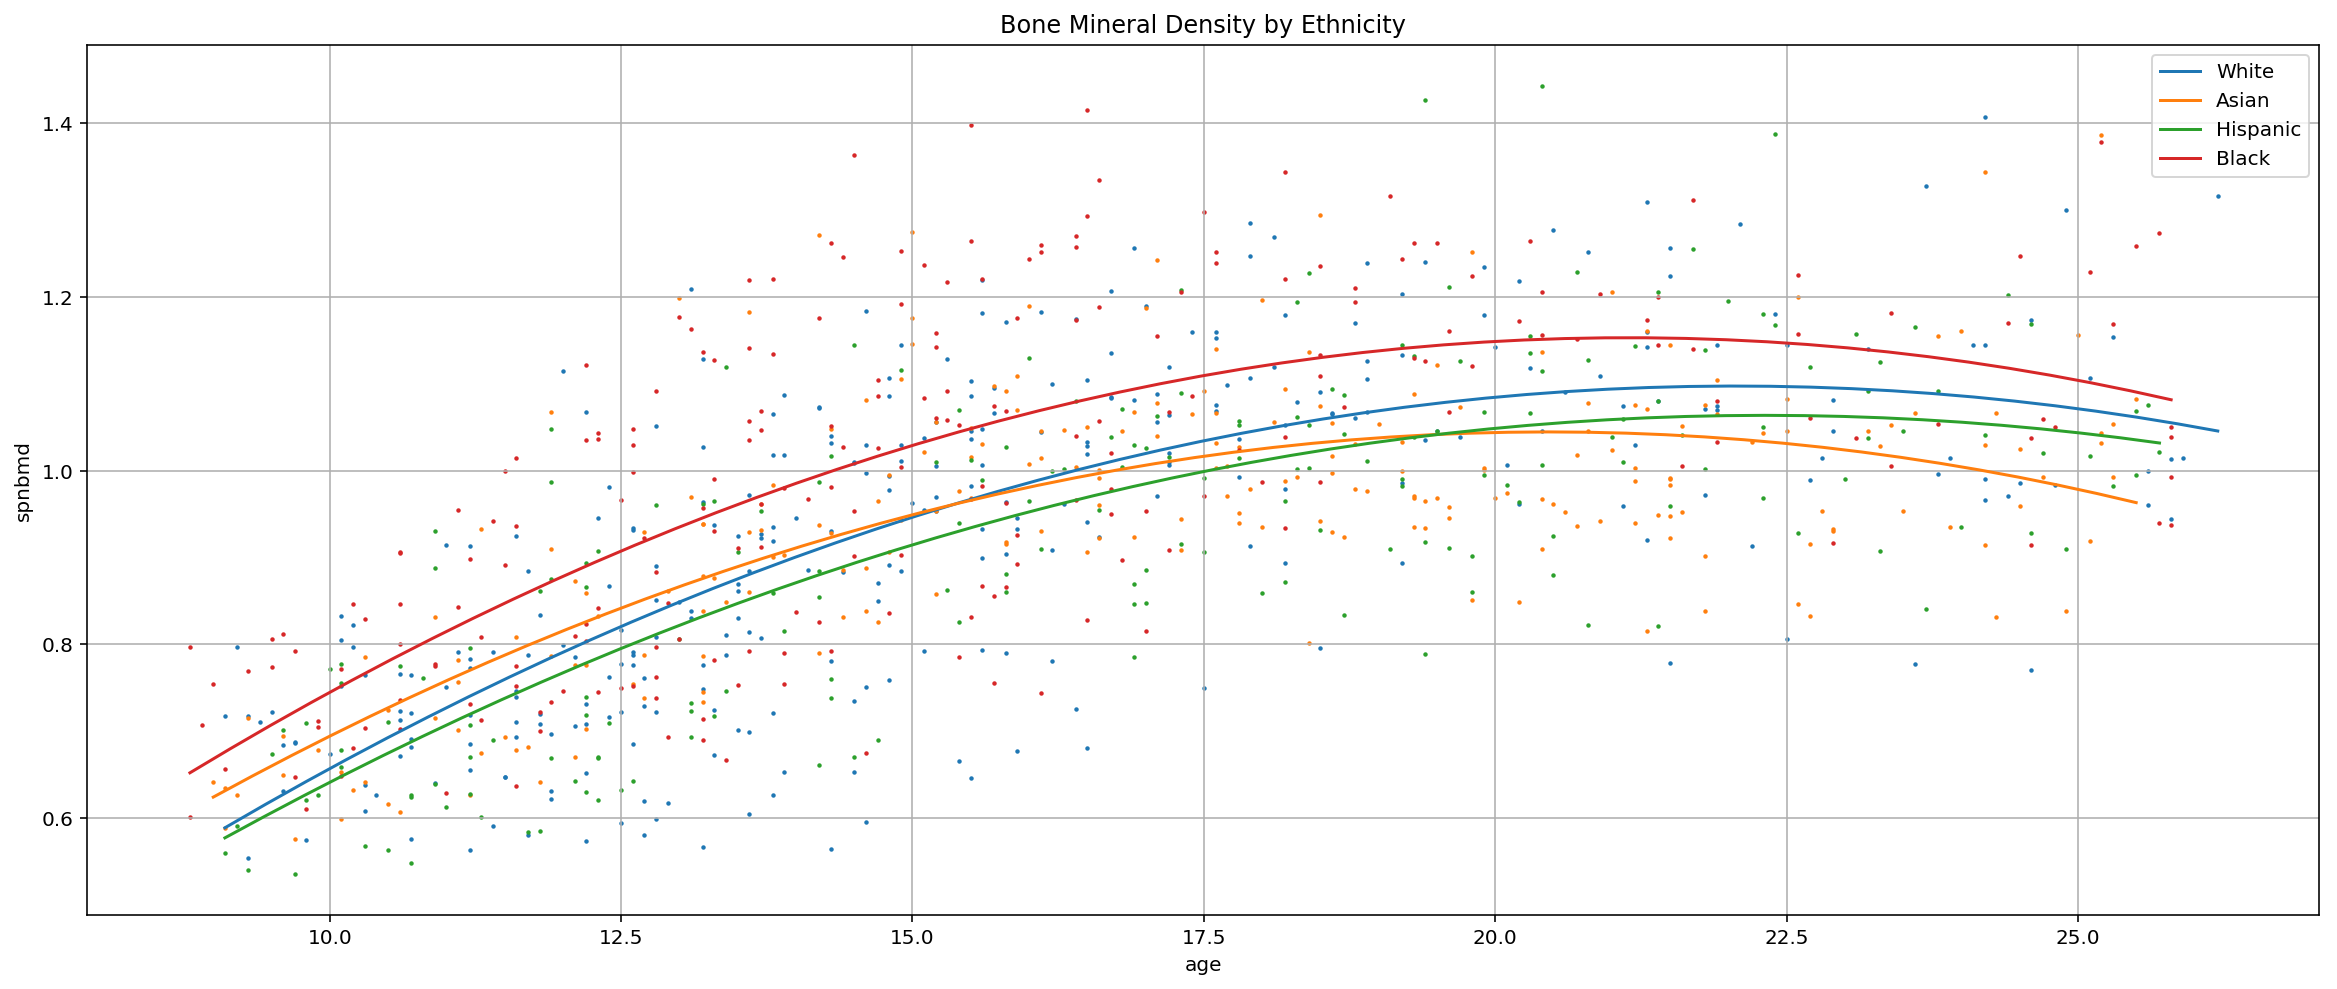

In [144]:
ethnic = 'White'
plt.figure(figsize=(20,8))
for ethnic in df.ethnic.unique():
    #plt.figure()
    cond = (df.ethnic==ethnic)
    p = np.polyfit(df[cond].age, df[cond].spnbmd, 2)
    plt.scatter(df[cond].age, df[cond].spnbmd, s=1.5, label=None)
    xs = np.linspace(df[cond].age.max(), df[cond].age.min())
    ys = np.polyval(p, xs)
    plt.plot(xs, ys, label=ethnic)
plt.title('Bone Mineral Density by Ethnicity')
plt.grid()
plt.xlabel('age')
plt.ylabel('spnbmd')
plt.grid()
plt.legend()
plt.grid()
plt.savefig('spnbmd_by_ethnicty.png', bbox_inches='tight')